<a href="https://colab.research.google.com/github/OmarJames8/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data = pd.read_csv('SeoulBikeData.csv')

In [ ]:
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

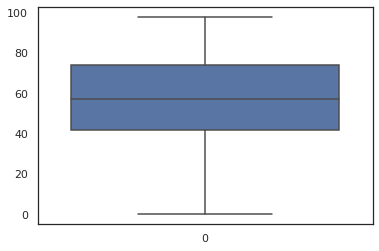

In [ ]:
sns.boxplot(data=data['Humidity(%)'])

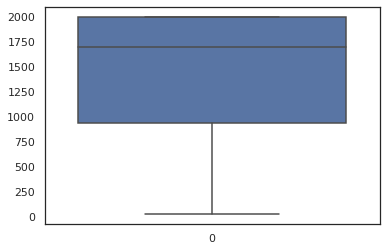

In [ ]:
sns.boxplot(data=data['Visibility (10m)'])

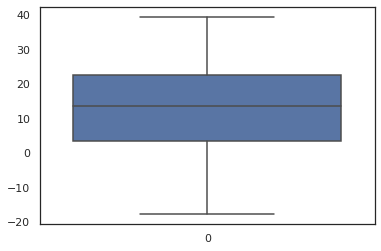

In [ ]:
sns.boxplot(data=data['Temperature(C)'])

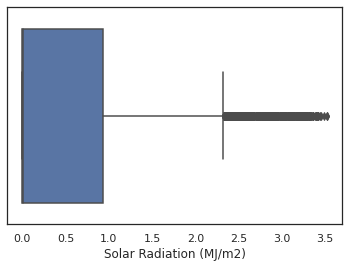

In [ ]:
sns.boxplot(data['Solar Radiation (MJ/m2)'])

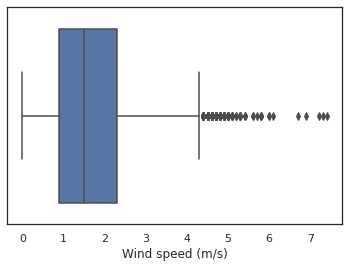

In [ ]:
sns.boxplot(data['Wind speed (m/s)'])

In [ ]:
df = data.corr()

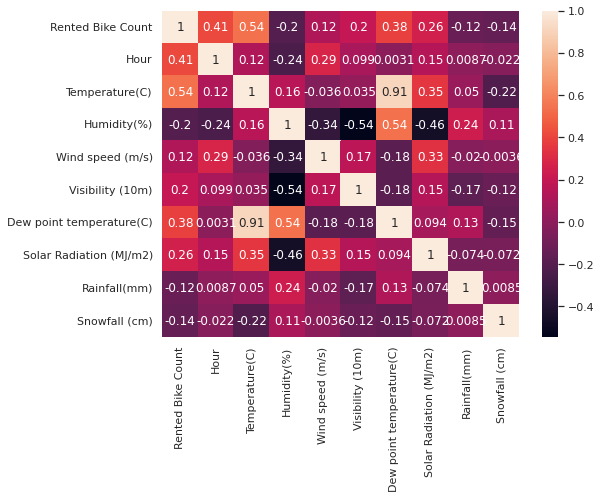

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df, annot=True)

In [ ]:
Q1 = np.percentile(data["Wind speed (m/s)"], 25)
Q2 = np.percentile(data["Wind speed (m/s)"], 50)
Q3 = np.percentile(data["Wind speed (m/s)"], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)



-1.1999999999999997 4.3999999999999995


In [ ]:
data = data[data['Wind speed (m/s)'] < upper_limit]
data = data[data['Wind speed (m/s)'] > lower_limit]

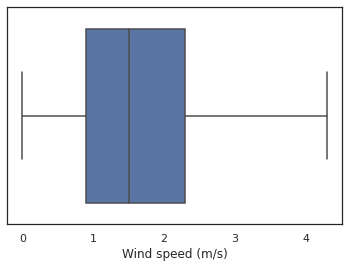

In [ ]:
sns.boxplot(data['Wind speed (m/s)'])

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data['Seasons'].value_counts()

Summer    2198
Autumn    2160
Spring    2150
Winter    2091
Name: Seasons, dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8599 non-null   datetime64[ns]
 1   Rented Bike Count         8599 non-null   int64         
 2   Hour                      8599 non-null   int64         
 3   Temperature(C)            8599 non-null   float64       
 4   Humidity(%)               8599 non-null   int64         
 5   Wind speed (m/s)          8599 non-null   float64       
 6   Visibility (10m)          8599 non-null   int64         
 7   Dew point temperature(C)  8599 non-null   float64       
 8   Solar Radiation (MJ/m2)   8599 non-null   float64       
 9   Rainfall(mm)              8599 non-null   float64       
 10  Snowfall (cm)             8599 non-null   float64       
 11  Seasons                   8599 non-null   object        
 12  Holiday             

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Functioning Day'] = en.fit_transform(data['Functioning Day'])

In [ ]:
data['Holiday'] = en.fit_transform(data['Holiday'])
data['Seasons'] = en.fit_transform(data['Seasons'])


In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [ ]:
#x = data.drop(['Rented Bike Count'], axis = 1)
y = data['Rented Bike Count']

In [ ]:
x = data.drop(['Date' , 'Rented Bike Count'], axis = 1)

In [ ]:
x.head(3)

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1


In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
x_train

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3448,16,9.6,96,1.7,1409,8.9,0.23,1.0,0.0,1,1,1
1540,4,-5.6,74,4.0,387,-9.5,0.00,0.0,0.2,3,1,1
5545,1,26.1,81,1.6,1409,22.5,0.00,0.0,0.0,2,1,1
5802,18,36.5,38,0.9,2000,19.8,1.17,0.0,0.0,2,1,1
5935,7,27.5,86,1.8,485,24.9,0.03,0.4,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,4,19.2,98,2.4,1965,18.8,0.00,19.0,0.0,1,1,1
2376,0,2.1,74,1.4,970,-2.0,0.00,0.0,0.0,1,1,1
6466,10,21.7,97,1.0,1249,21.1,0.29,2.5,0.0,2,1,1
6592,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,0,1,1


In [ ]:
x_test

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7389,21,20.5,57,2.0,2000,11.6,0.00,0.0,0.0,0,1,0
1323,3,-16.0,40,1.9,2000,-26.5,0.00,0.0,0.7,3,1,1
4256,8,18.3,51,2.0,1366,7.9,0.70,0.0,0.0,1,1,1
8397,21,9.6,52,1.3,906,0.2,0.00,0.0,0.0,0,1,1
817,1,-6.9,56,2.3,1994,-14.2,0.00,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8728,16,5.8,39,2.6,1489,-7.1,0.10,0.0,0.0,0,1,1
1804,4,1.1,67,1.7,1506,-4.3,0.00,0.0,0.0,3,1,1
4244,20,22.3,50,2.7,1512,11.3,0.05,0.0,0.0,1,1,1
203,11,0.0,45,1.1,1500,-10.5,0.89,0.0,0.0,3,1,1


In [ ]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model_predict = model.predict(x_test)
model_predict

array([ 547.95171056, -240.7261843 ,  927.49710709, ..., 1464.57370162,
        274.30815342,  807.75501818])

In [ ]:
score = model.score(x_test, y_test)
score

0.5284095858785169